We will use the daily data from cnecovid.

In [1]:
!wget -N https://cnecovid.isciii.es/covid19/resources/casos_diagnostico_ccaa.csv

--2021-04-02 16:59:26--  https://cnecovid.isciii.es/covid19/resources/casos_diagnostico_ccaa.csv
Resolving cnecovid.isciii.es (cnecovid.isciii.es)... 193.146.50.165
Connecting to cnecovid.isciii.es (cnecovid.isciii.es)|193.146.50.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 213952 (209K) [application/octet-stream]
Saving to: ‘casos_diagnostico_ccaa.csv’

casos_diagnostico_c 100%[===================>] 208.94K   501KB/s    in 0.4s    

2021-04-02 16:59:27 (501 KB/s) - ‘casos_diagnostico_ccaa.csv’ saved [213952/213952]



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [2]:
import pandas as pd
import numpy as np

from pyearth import Earth
from pyearth import export

# from jupyterthemes import jtplot
# jtplot.style(theme='onedork')

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format. Data for Namibia caused missing values because the `geoId` is __NA__, so we disable interpretation of missing values.

In [3]:
df = pd.read_csv(
    "casos_diagnostico_ccaa.csv", keep_default_na=False, na_values="", parse_dates=[1]
)
lastdate = df["fecha"].max() - pd.Timedelta("7 days")
df.head(10)

ccaa_iso      fecha  num_casos  num_casos_prueba_pcr  \
0       AN 2020-01-01          0                     0   
1       AR 2020-01-01          0                     0   
2       AS 2020-01-01          0                     0   
3       CB 2020-01-01          0                     0   
4       CE 2020-01-01          1                     0   
5       CL 2020-01-01          0                     0   
6       CM 2020-01-01          0                     0   
7       CN 2020-01-01          0                     0   
8       CT 2020-01-01          3                     3   
9       EX 2020-01-01          0                     0   

   num_casos_prueba_test_ac  num_casos_prueba_ag  num_casos_prueba_elisa  \
0                         0                    0                       0   
1                         0                    0                       0   
2                         0                    0                       0   
3                         0                    0                       0   
4                         0                    1                       0   
5                         0                    0                       0   
6                         0                    0                       0   
7                         0                    0                       0   
8                         0                    0                       0   
9                         0                    0                       0   

   num_casos_prueba_desconocida  
0                             0  
1                             0  
2                             0  
3                             0  
4                             0  
5                             0  
6                             0  
7                             0  
8                             0  
9                             0

In [4]:
df_loc = pd.read_excel(
    "SPANISH-CODES.xlsx", sheet_name="CCAA", keep_default_na=False, na_values=""
)
df_loc["COD_CCAA"] = df_loc["COD_CCAA"].apply(str.strip)
df_loc

COD_CCAA                     CCAA        LAT          LONG
0        AN                Andalucía  37.746222 -4.554982e+00
1        AR                   Aragón  41.655767 -8.993490e-01
2        AS  Asturias, Principado de  43.339126 -5.835657e+00
3        CN                 Canarias  28.472316 -1.629854e+01
4        CB                Cantabria  43.465773 -3.834682e+00
5        CM       Castilla-La Mancha  39.918263 -3.966983e+00
6        CL          Castilla y León  41.657179 -4.718616e+00
7        CT               Catalunya​  41.440183  2.146459e+00
8        EX              Extremadura  39.191439 -6.128023e+00
9        GA                 Galicia​  42.883738 -8.509078e+00
10       IB            Illes Balears  39.577944  2.650378e+00
11       RI                 La Rioja  42.454080 -2.438287e+06
12       MD      Comunidad de Madrid  40.422451 -3.697740e+00
13       MC         Región de Murcia  38.029986 -1.125442e+00
14       NC                  Navarra  42.837333 -1.637375e+00
15       PV               País Vasco  42.851582 -2.658177e+00
16       VC     Comunidad Valenciana  39.482401 -3.724340e-01
17       CE                    Ceuta  35.891943 -5.321092e+00
18       ML                  Melilla  35.298177 -2.938964e+00

Last check of our source dataframe.

In [5]:
df.count()

ccaa_iso                        7429
fecha                           7429
num_casos                       7429
num_casos_prueba_pcr            7429
num_casos_prueba_test_ac        7429
num_casos_prueba_ag             7429
num_casos_prueba_elisa          7429
num_casos_prueba_desconocida    7429
dtype: int64

We pivot to a country by column format.

In [6]:
df_geo = df.pivot(index="fecha", columns="ccaa_iso", values=["num_casos"])
df_geo

num_casos                                                       \
ccaa_iso          AN   AR   AS   CB  CE    CL    CM   CN    CT   EX    GA   
fecha                                                                       
2020-01-01         0    0    0    0   1     0     0    0     3    0     0   
2020-01-02         0    0    0    0   0     0     0    0     9    0     2   
2020-01-03         0    0    0    0   0     0     0    0     7    0     2   
2020-01-04         0    0    0    0   1     0     0    0     4    0     4   
2020-01-05         0    0    0    0   0     0     0    0     4    0     2   
...              ...  ...  ...  ...  ..   ...   ...  ...   ...  ...   ...   
2021-01-21      6149  524  513  171  29  2013  1170  231  3147  737  1424   
2021-01-22      6472  491   41   58  20  1130   833  123  2972  163   382   
2021-01-23      3828  281   20   14   8   625   243  124  1089   58   147   
2021-01-24       259  300    7    5   8   262    46   63   744    5    11   
2021-01-25         0    0    0    0   4     0     0    1     0    0     0   

                                                     
ccaa_iso     IB   MC    MD  ML   NC   PV   RI    VC  
fecha                                                
2020-01-01    0    0     3   0    0    0    0     3  
2020-01-02    0    0     4   0    0    0    0     2  
2020-01-03    0    0     3   0    0    0    2     0  
2020-01-04    0    0     5   0    0    0    0     0  
2020-01-05    0    0     3   0    0    0    2     1  
...         ...  ...   ...  ..  ...  ...  ...   ...  
2021-01-21  318  747  3896  37  209  741  235  4076  
2021-01-22  186  528  4665  28  148  487   40  3095  
2021-01-23  103  281   872  23   85  239   40  1570  
2021-01-24   40   55   466  15   67  289   16  1018  
2021-01-25    0    0     0   0    0    0    0   108  

[391 rows x 19 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we add to the current range and check our latest date.

In [7]:
new_index = pd.date_range(
    df_geo.index.min(), df_geo.index.max() + pd.Timedelta("365 days")
)
df_geo = df_geo.reindex(new_index)
df_geo

num_casos                                                         \
ccaa_iso          AN   AR   AS   CB   CE   CL   CM   CN   CT   EX   GA   IB   
2020-01-01       0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  3.0  0.0  0.0  0.0   
2020-01-02       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  9.0  0.0  2.0  0.0   
2020-01-03       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  7.0  0.0  2.0  0.0   
2020-01-04       0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  4.0  0.0  4.0  0.0   
2020-01-05       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  4.0  0.0  2.0  0.0   
...              ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2022-01-21       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2022-01-22       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2022-01-23       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2022-01-24       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2022-01-25       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

                                               
ccaa_iso     MC   MD   ML   NC   PV   RI   VC  
2020-01-01  0.0  3.0  0.0  0.0  0.0  0.0  3.0  
2020-01-02  0.0  4.0  0.0  0.0  0.0  0.0  2.0  
2020-01-03  0.0  3.0  0.0  0.0  0.0  2.0  0.0  
2020-01-04  0.0  5.0  0.0  0.0  0.0  0.0  0.0  
2020-01-05  0.0  3.0  0.0  0.0  0.0  2.0  1.0  
...         ...  ...  ...  ...  ...  ...  ...  
2022-01-21  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2022-01-22  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2022-01-23  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2022-01-24  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2022-01-25  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[756 rows x 19 columns]

We need numerical data as inputs for a model, so we add a column representing the date as days since the start of the index.

In [8]:
df_geo["daynum"] = (df_geo.index - df_geo.index.min()).days
df_geo["daynum"].describe()

count    756.000000
mean     377.500000
std      218.382692
min        0.000000
25%      188.750000
50%      377.500000
75%      566.250000
max      755.000000
Name: daynum, dtype: float64

We create a simple dataframe to contain the source values for our fitting approach. The typical progress of an outbreak seems to fit a Gumbel distribution, where the cumulative distribution is a double negative exponent: `exp(-exp(-x))`. The measures are averaged by week to smooth out reporting lags.

In [9]:
def gumpdf(x, beta, mu):
    """Return PDF value according to Gumbel"""
    expon = -((x - mu) / beta)
    return np.exp(expon) * np.exp(-(np.exp(expon))) / beta


def gumcdf(x, beta, mu):
    """Return CDF value according to Gumbel"""
    expon = -((x - mu) / beta)
    return np.exp(-(np.exp(expon)))

In [10]:
import matplotlib as mpl

mpl.rc("figure", max_open_warning=0)

Running multiple wave analysis for Andalucía (AN)
Minimum number of cases is 2
Wave 01 beta 10.008 mu  82 fit 0.815 peak 2020-03-23 from 2020-03-01 to 2020-06-03 size 13527
Wave 02 beta  4.451 mu 183 fit 0.841 peak 2020-07-02 from 2020-06-25 to 2020-07-21 size 283
Wave 03 beta 10.993 mu 206 fit 0.828 peak 2020-07-25 from 2020-07-03 to 2020-09-24 size 2904
Wave 04 beta  7.787 mu 220 fit 0.762 peak 2020-08-08 from 2020-07-23 to 2020-09-27 size 4120
Wave 05 beta 11.066 mu 237 fit 0.896 peak 2020-08-25 from 2020-07-31 to 2020-11-16 size 19885
Wave 06 beta  5.462 mu 243 fit 0.862 peak 2020-08-31 from 2020-08-19 to 2020-10-06 size 4192
Wave 07 beta  5.187 mu 250 fit 0.821 peak 2020-09-07 from 2020-08-27 to 2020-10-15 size 6315
Wave 08 beta 10.766 mu 268 fit 0.915 peak 2020-09-25 from 2020-08-31 to 2020-12-20 size 30819
Wave 09 beta  2.255 mu  83 fit 0.250 peak 2020-03-24 from 2020-03-20 to 2020-04-05 size 312
Wave 10 beta  8.068 mu 287 fit 0.968 peak 2020-10-14 from 2020-09-25 to 2020-12-20 

Wave 09 beta  9.800 mu 218 fit 0.805 peak 2020-08-06 from 2020-07-19 to 2020-09-23 size 1180
Wave 10 beta 13.242 mu 238 fit 0.877 peak 2020-08-26 from 2020-07-29 to 2020-11-21 size 9022
Wave 11 beta  6.877 mu 243 fit 0.880 peak 2020-08-31 from 2020-08-17 to 2020-10-13 size 3036
Wave 12 beta  6.034 mu 252 fit 0.944 peak 2020-09-09 from 2020-08-28 to 2020-10-20 size 4905
Wave 13 beta  8.661 mu 266 fit 0.868 peak 2020-09-23 from 2020-09-04 to 2020-11-25 size 13055
Wave 14 beta  6.484 mu 283 fit 0.868 peak 2020-10-10 from 2020-09-26 to 2020-11-24 size 6170
Wave 15 beta  5.822 mu 293 fit 0.833 peak 2020-10-20 from 2020-10-07 to 2020-11-30 size 6394
Wave 16 beta  7.146 mu 304 fit 0.950 peak 2020-10-31 from 2020-10-15 to 2020-12-25 size 14389
Wave 17 beta  4.720 mu 314 fit 0.879 peak 2020-11-10 from 2020-10-31 to 2020-12-13 size 4651
Wave 18 beta  4.806 mu 324 fit 0.854 peak 2020-11-20 from 2020-11-10 to 2020-12-22 size 3840
Wave 19 beta  8.194 mu 340 fit 0.934 peak 2020-12-06 from 2020-11-18

Wave 07 beta  6.327 mu 264 fit 0.776 peak 2020-09-21 from 2020-09-09 to 2020-10-24 size 1117
Wave 08 beta  6.234 mu 282 fit 0.679 peak 2020-10-09 from 2020-09-28 to 2020-11-12 size 1185
Wave 09 beta  2.933 mu 279 fit 0.388 peak 2020-10-06 from 2020-10-01 to 2020-10-17 size 113
Wave 10 beta  5.909 mu 303 fit 0.847 peak 2020-10-30 from 2020-10-18 to 2020-12-06 size 2890
Wave 11 beta 13.268 mu 326 fit 0.550 peak 2020-11-22 from 2020-10-25 to 2021-02-17 size 9056
Wave 12 beta 10.610 mu 356 fit 0.905 peak 2020-12-22 from 2020-11-29 to 2021-03-07 size 11910
Wave 13 beta  8.021 mu 378 fit 0.863 peak 2021-01-13 from 2020-12-26 to 2021-03-13 size 11986
--- no data for wave
Running multiple wave analysis for Región de Murcia (MC)
Minimum number of cases is 2
Wave 01 beta  6.480 mu  79 fit 0.852 peak 2020-03-20 from 2020-03-08 to 2020-04-25 size 1586
Wave 02 beta  3.153 mu  66 fit 0.415 peak 2020-03-07 from 2020-03-03 to 2020-03-19 size 95
Wave 03 beta 23.968 mu 185 fit 0.792 peak 2020-07-04 from

Wave 13 beta  6.254 mu 350 fit 0.837 peak 2020-12-16 from 2020-12-02 to 2021-01-26 size 4711
Wave 14 beta  7.214 mu 281 fit 0.647 peak 2020-10-08 from 2020-09-23 to 2020-11-21 size 3260
Wave 15 beta  8.054 mu 381 fit 0.825 peak 2021-01-16 from 2020-12-29 to 2021-03-18 size 14563
--- no data for wave
Running multiple wave analysis for La Rioja (RI)
Minimum number of cases is 2
Wave 01 beta 11.127 mu  81 fit 0.927 peak 2020-03-22 from 2020-02-29 to 2020-05-28 size 4354
Wave 02 beta  4.398 mu 230 fit 0.821 peak 2020-08-18 from 2020-08-10 to 2020-09-10 size 801
Wave 03 beta  6.294 mu 242 fit 0.917 peak 2020-08-30 from 2020-08-18 to 2020-10-03 size 1351
Wave 04 beta 10.762 mu 262 fit 0.837 peak 2020-09-19 from 2020-08-29 to 2020-11-19 size 2972
Wave 05 beta  7.967 mu 287 fit 0.798 peak 2020-10-14 from 2020-09-28 to 2020-11-25 size 1563
Wave 06 beta  8.395 mu 298 fit 0.931 peak 2020-10-25 from 2020-10-08 to 2020-12-13 size 2905
Wave 07 beta  8.194 mu 313 fit 0.972 peak 2020-11-09 from 2020-1

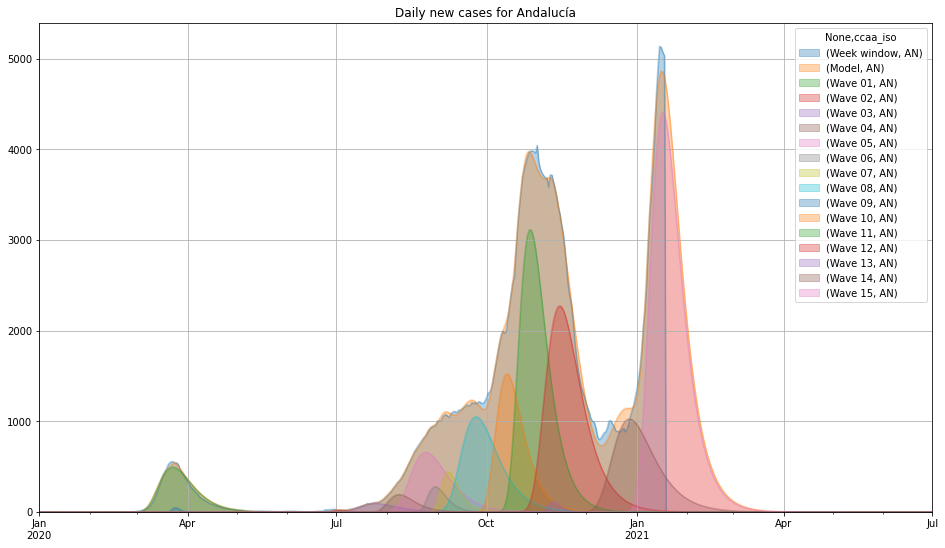

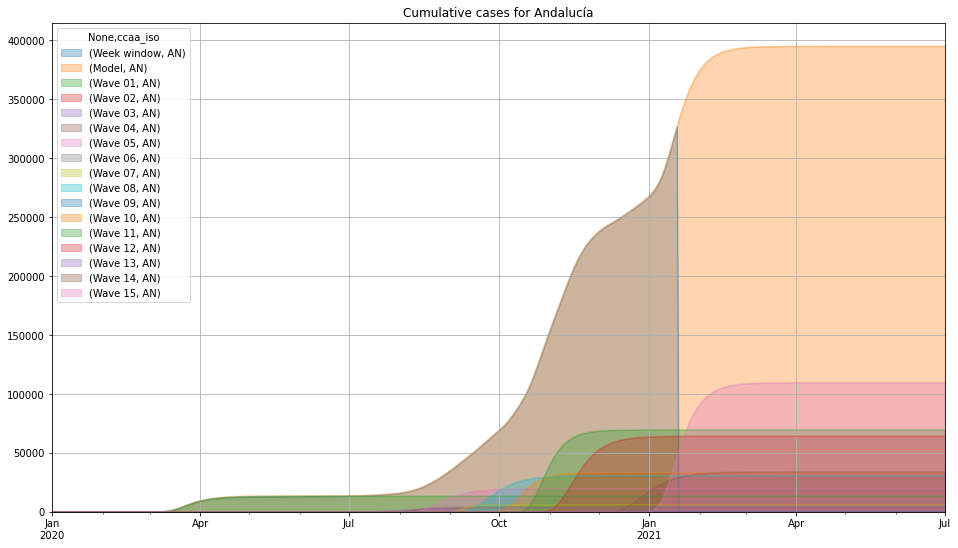

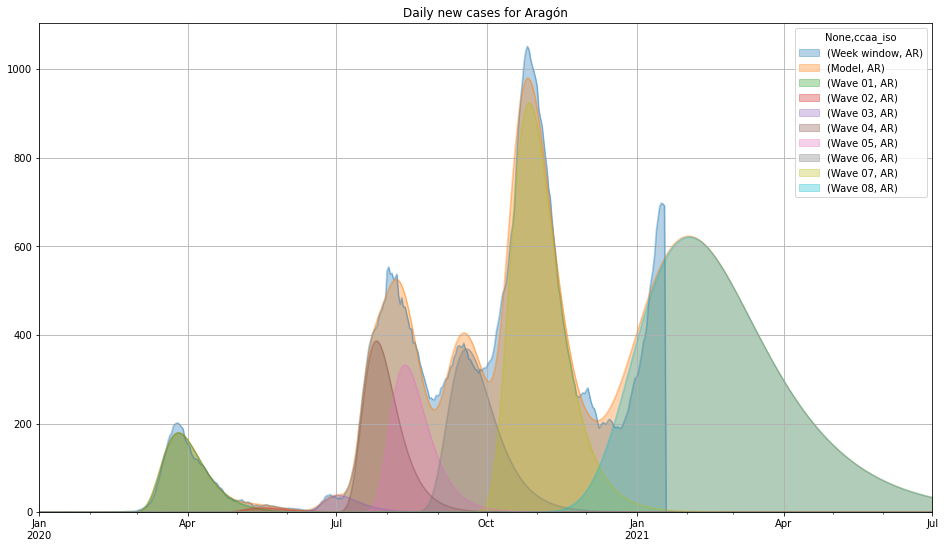

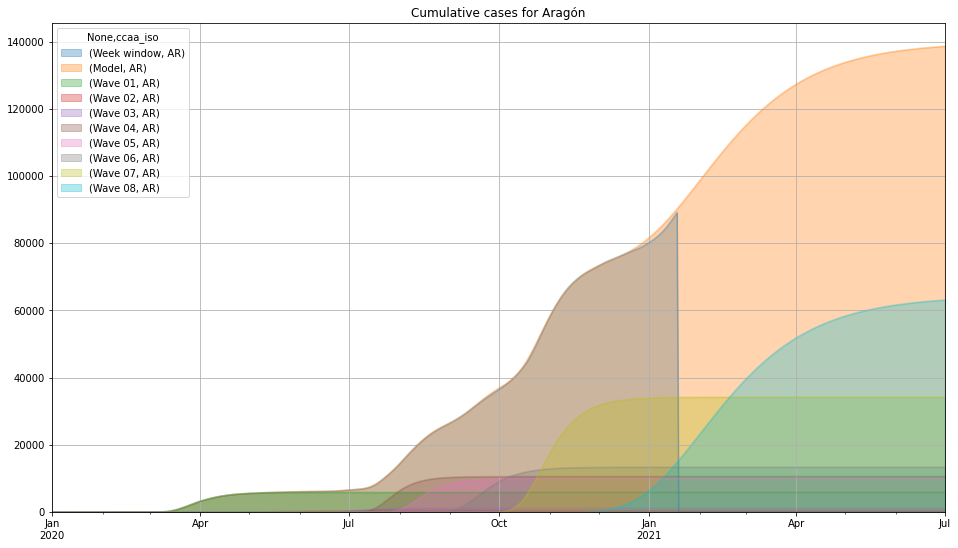

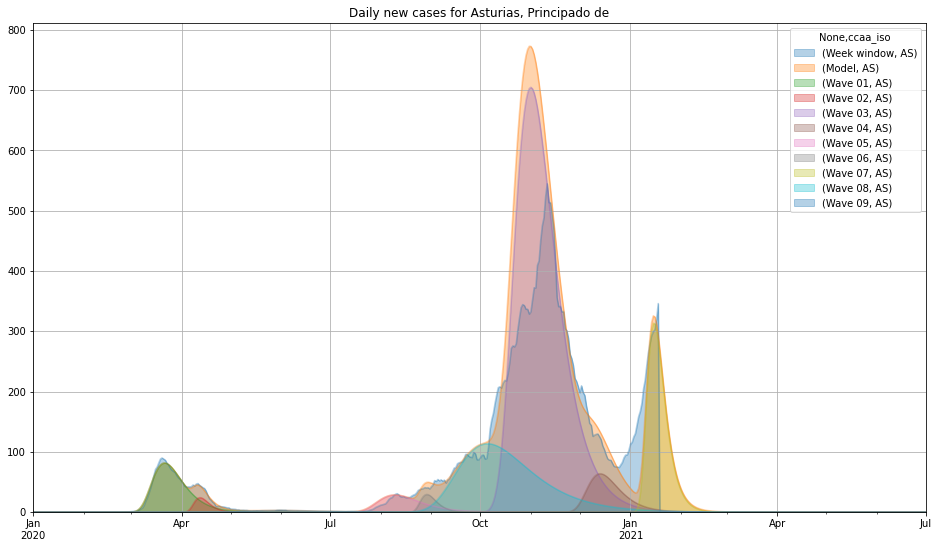

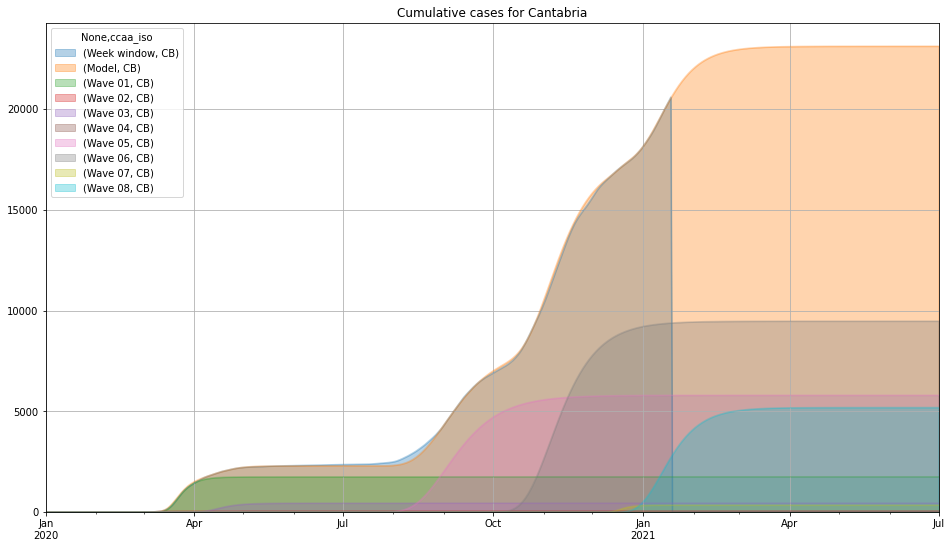

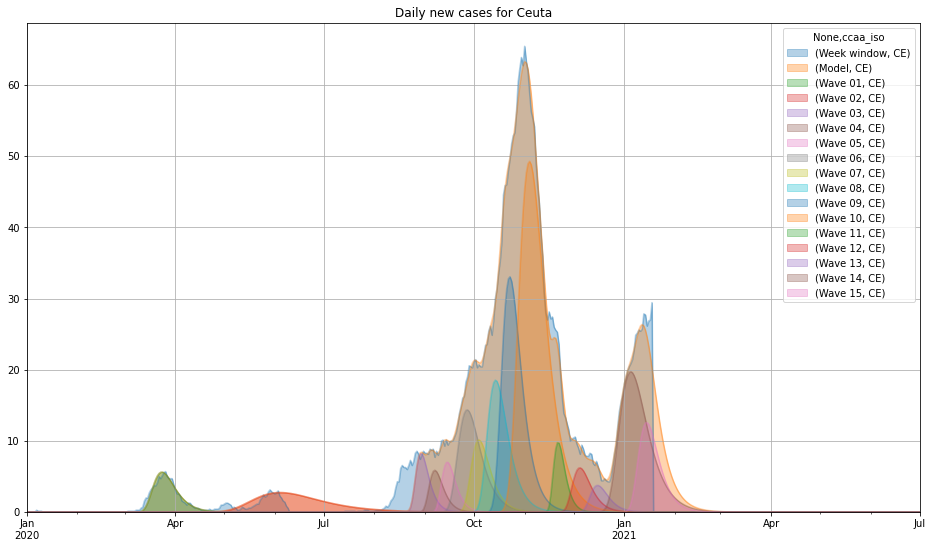

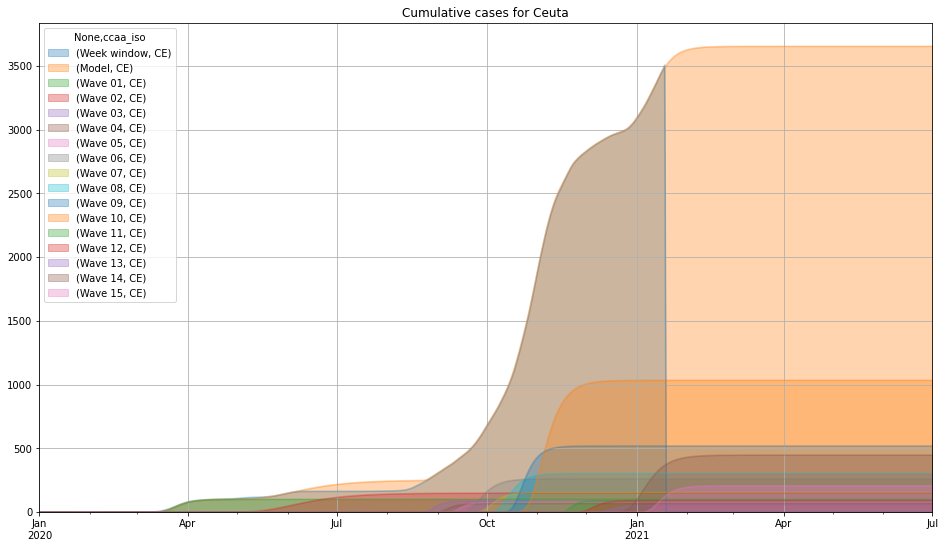

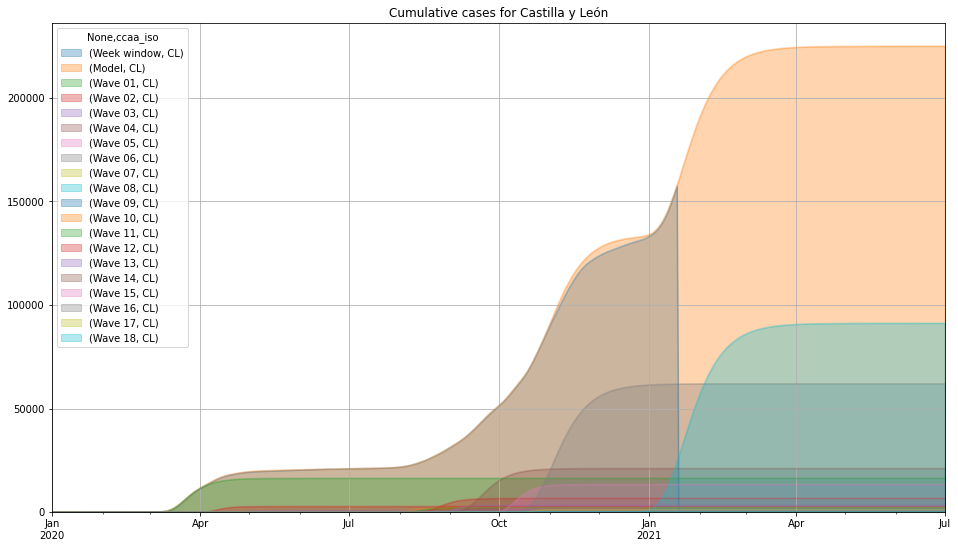

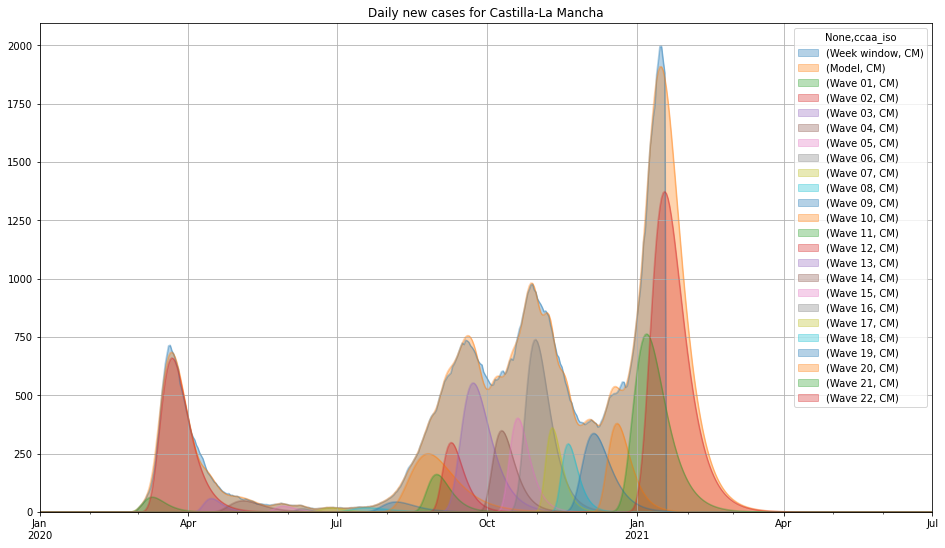

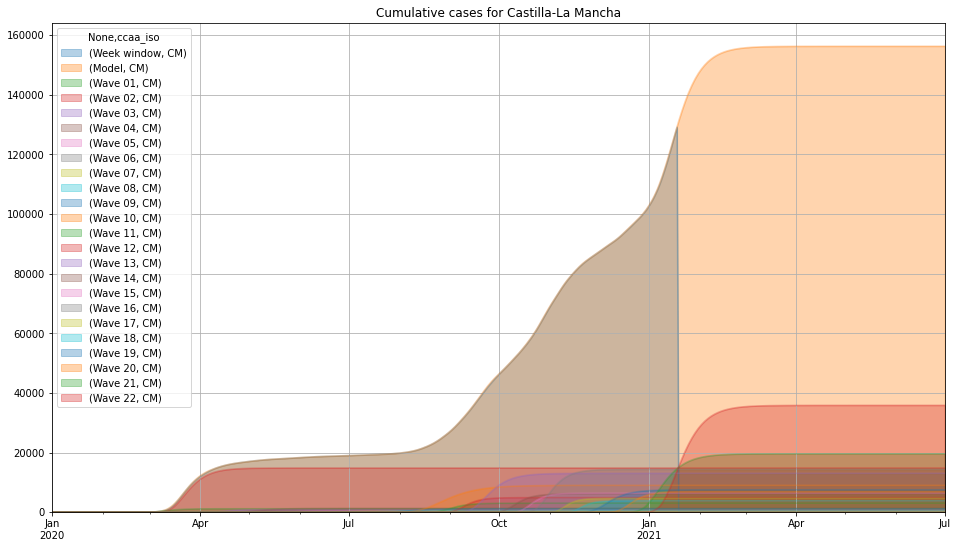

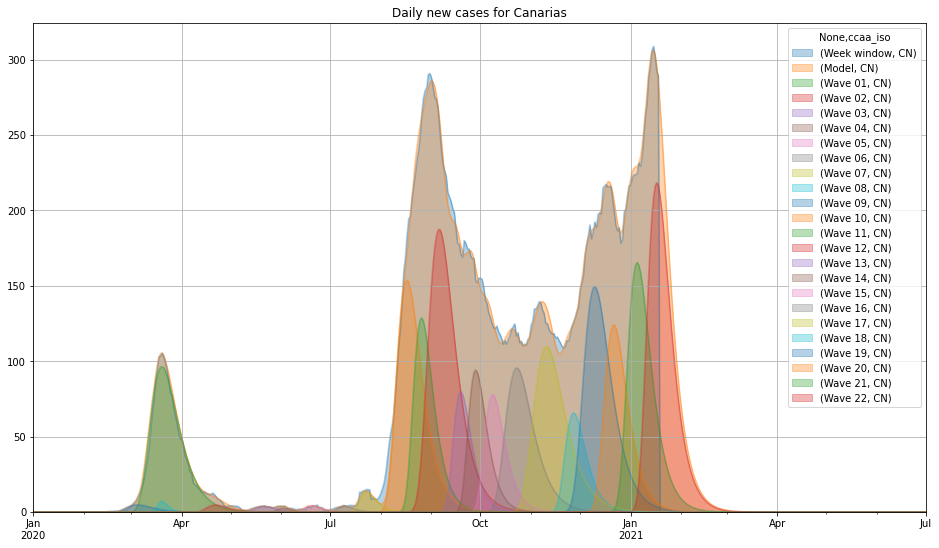

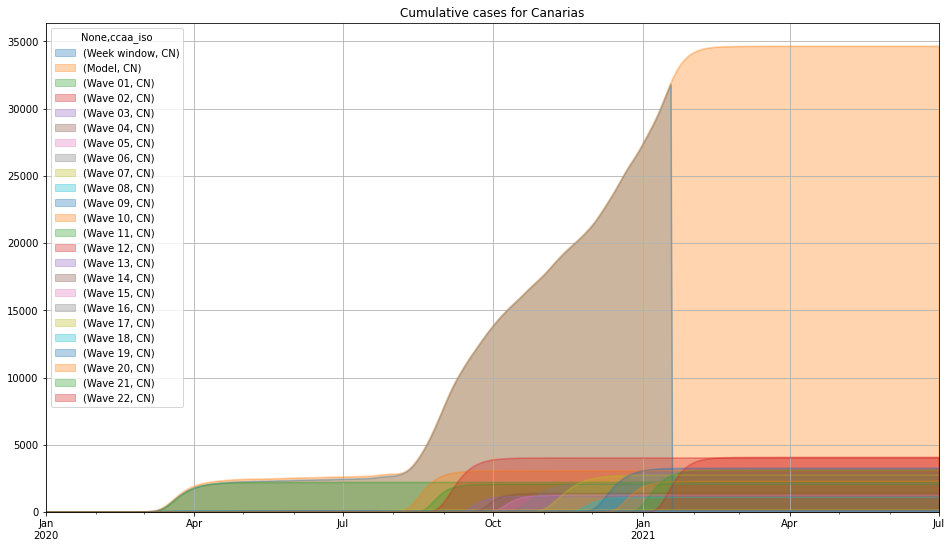

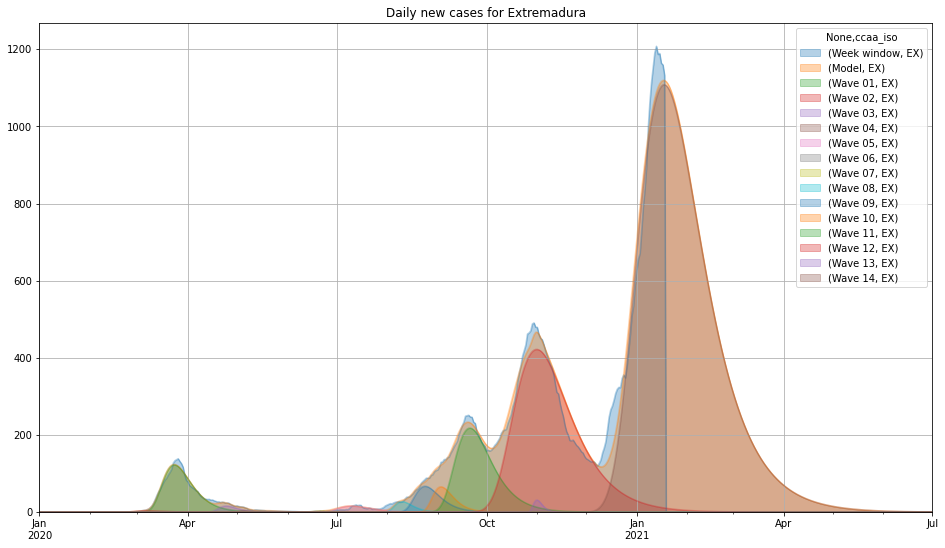

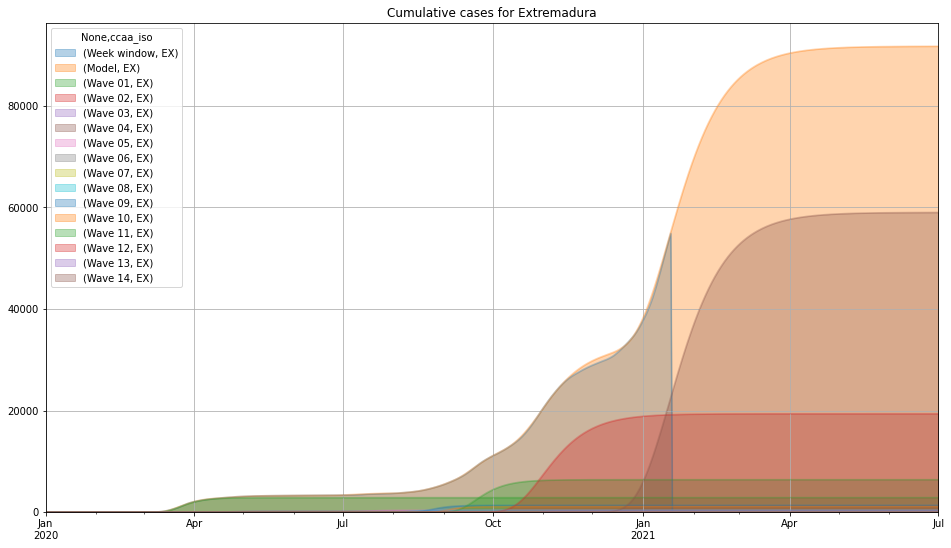

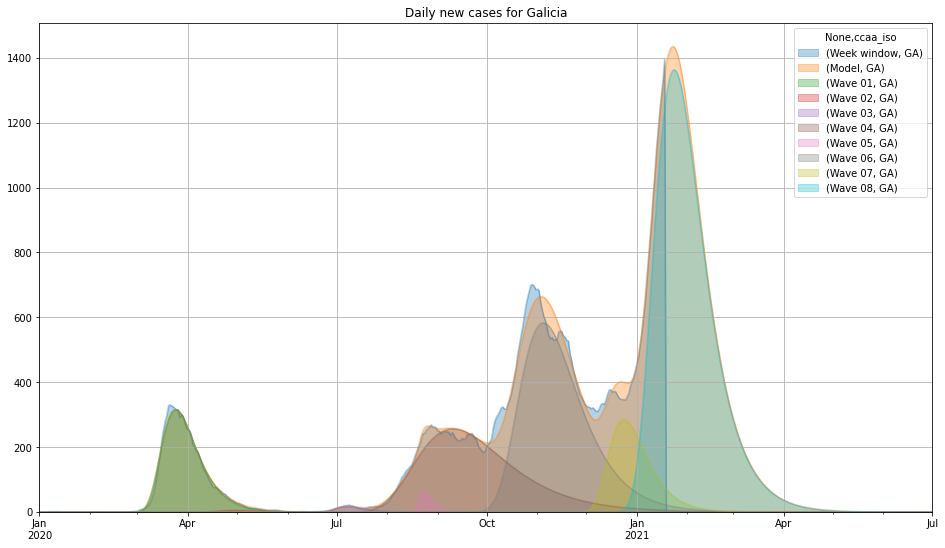

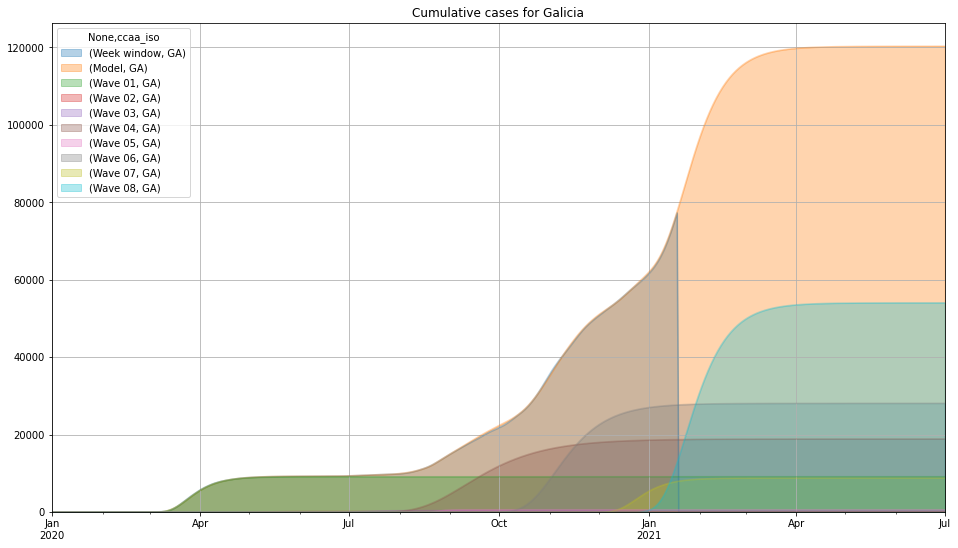

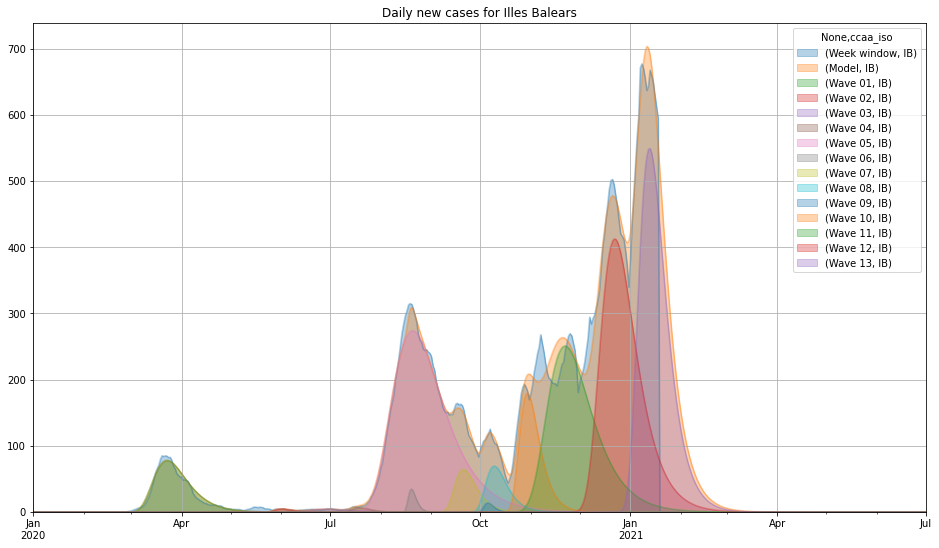

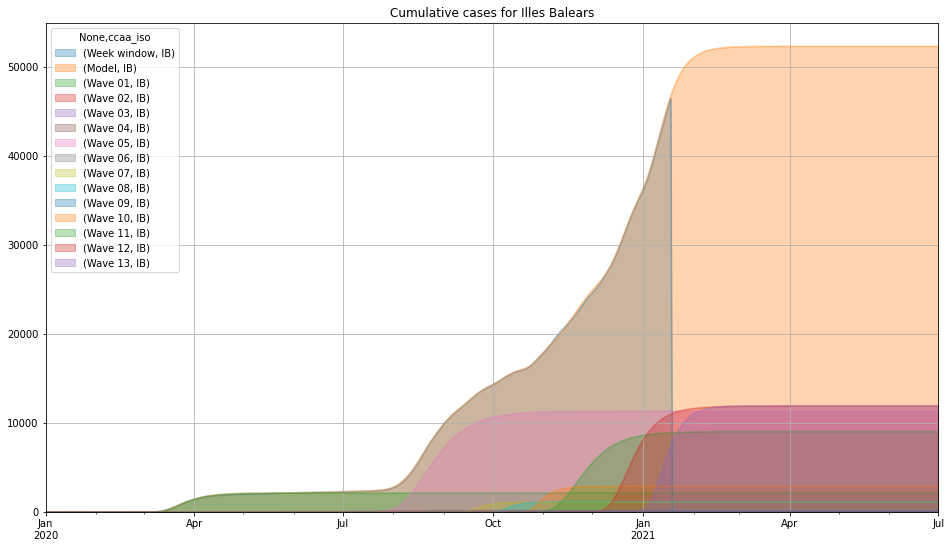

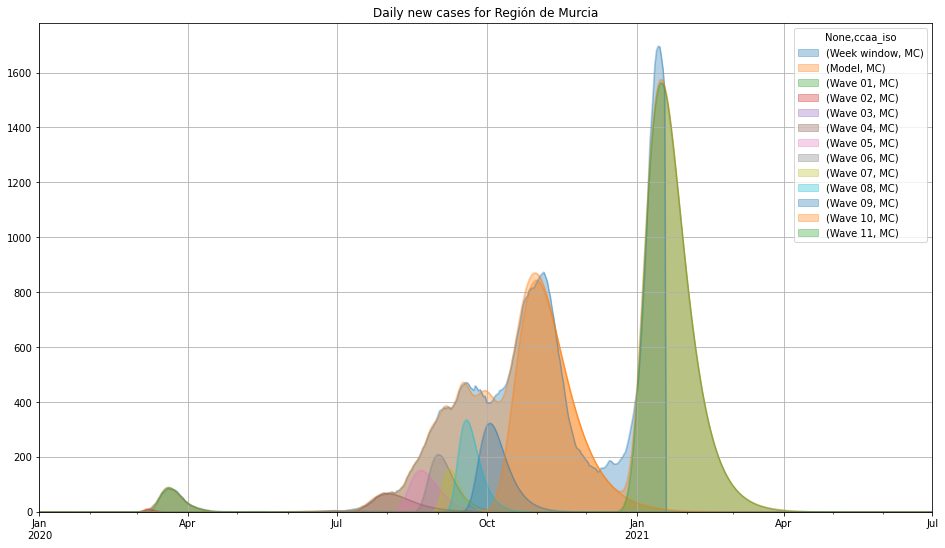

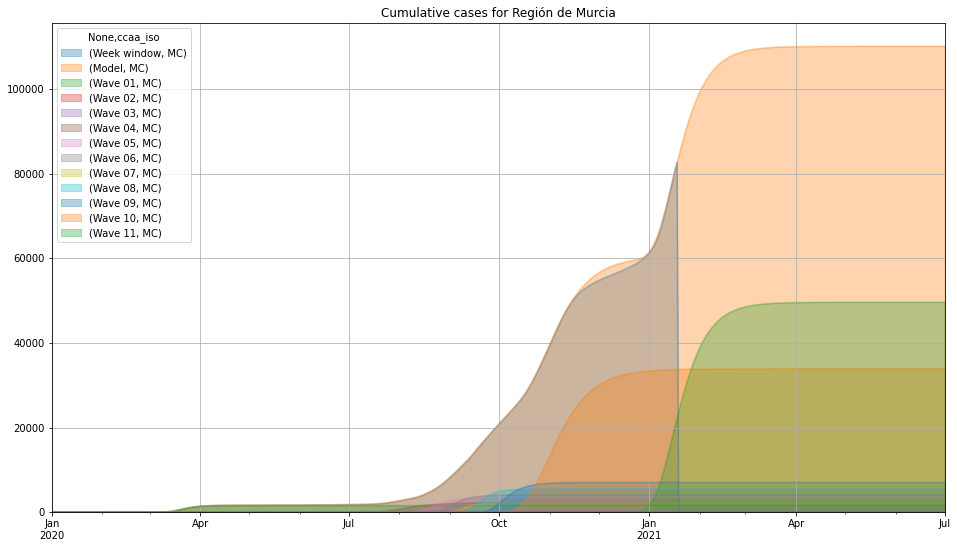

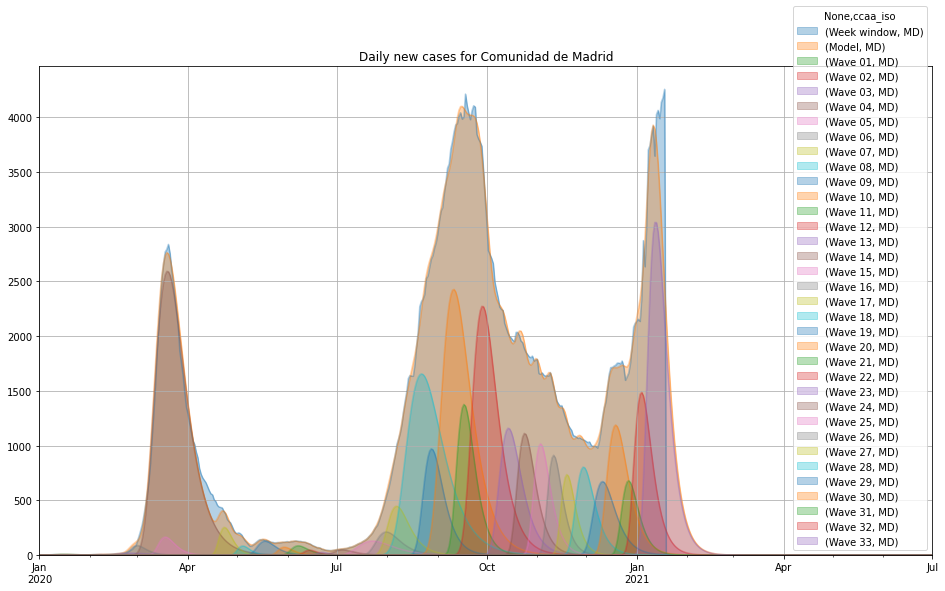

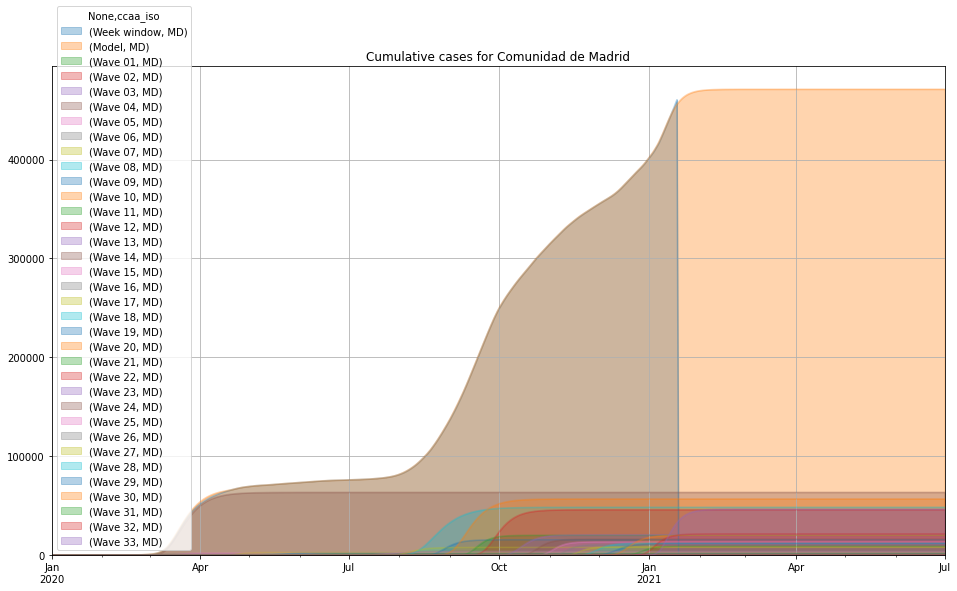

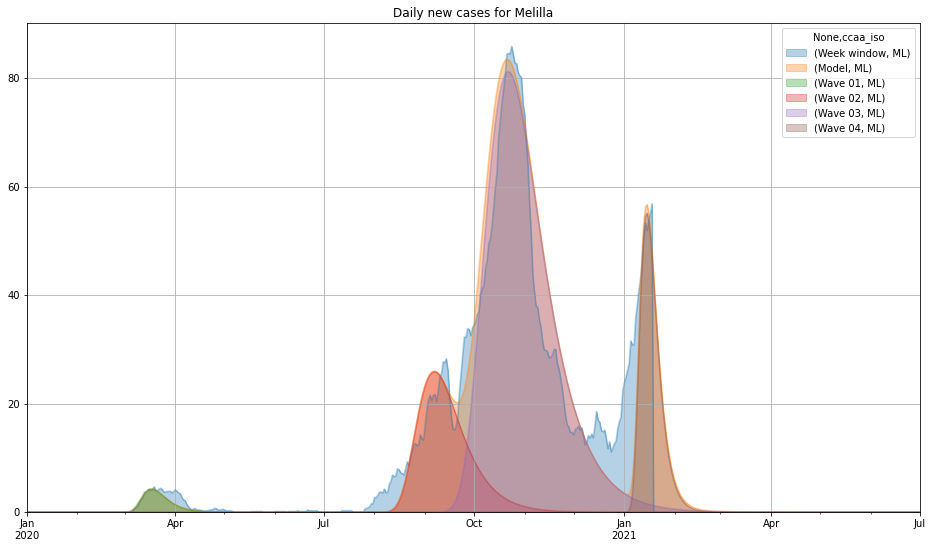

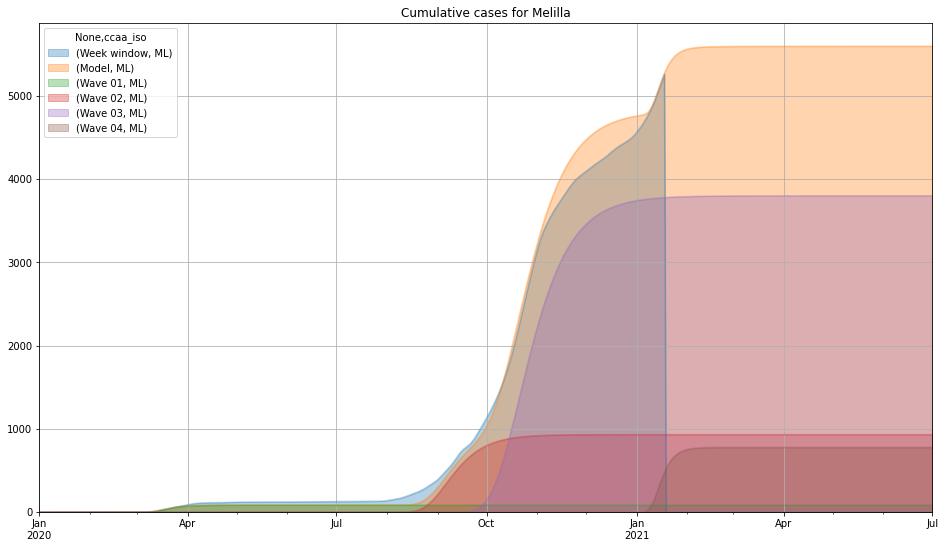

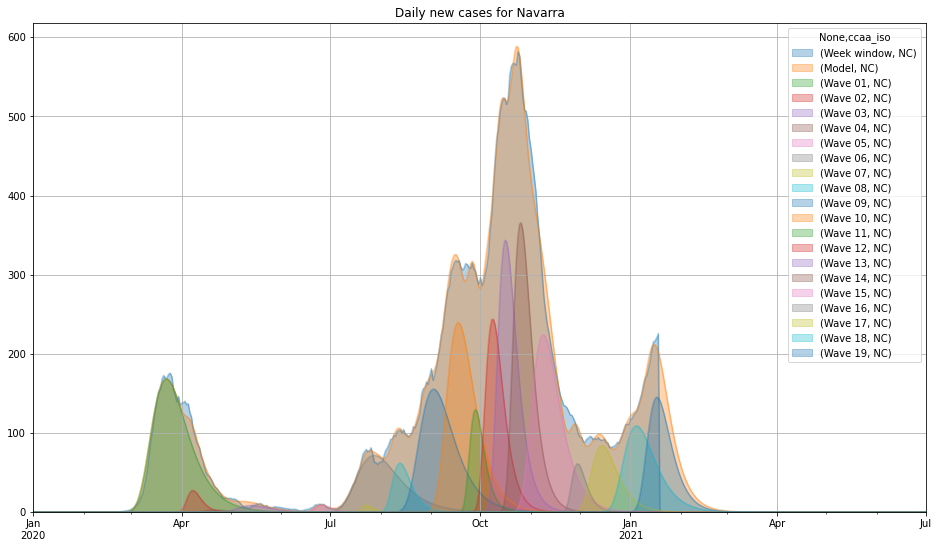

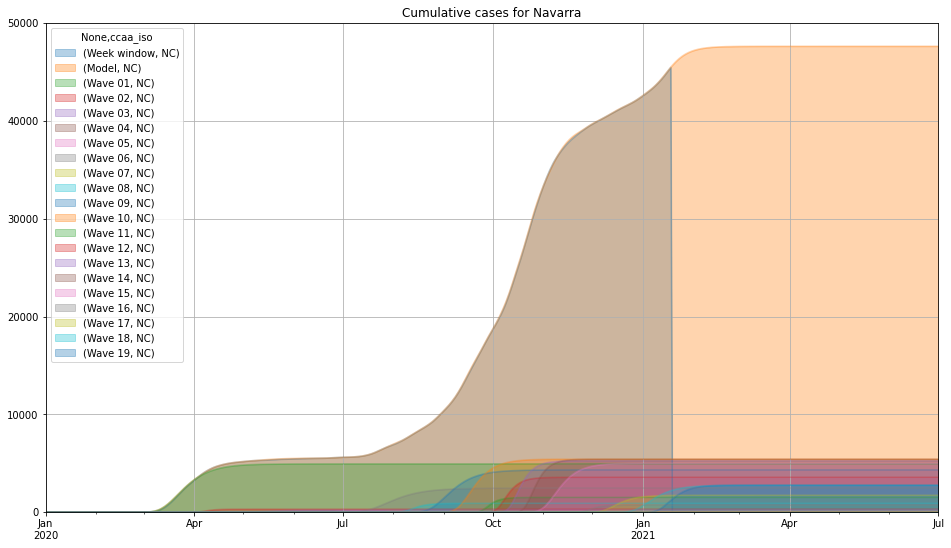

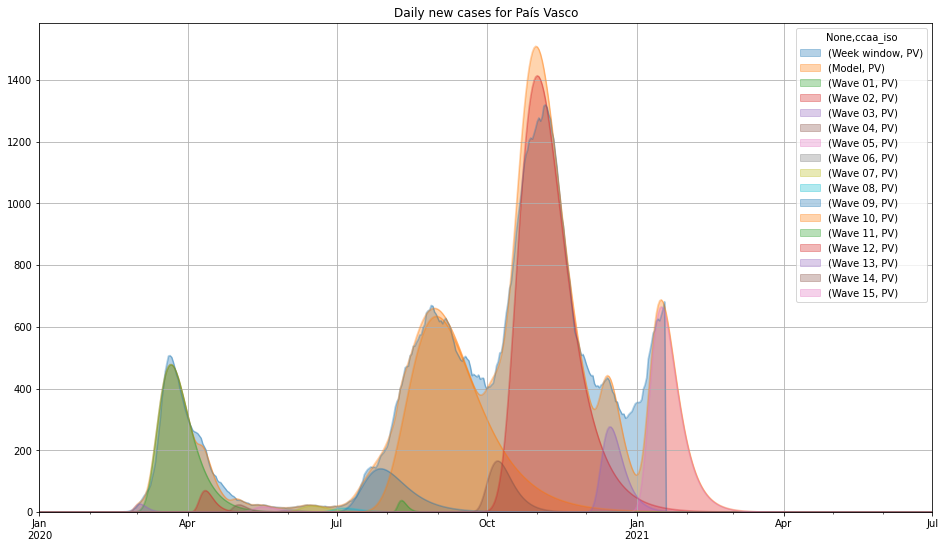

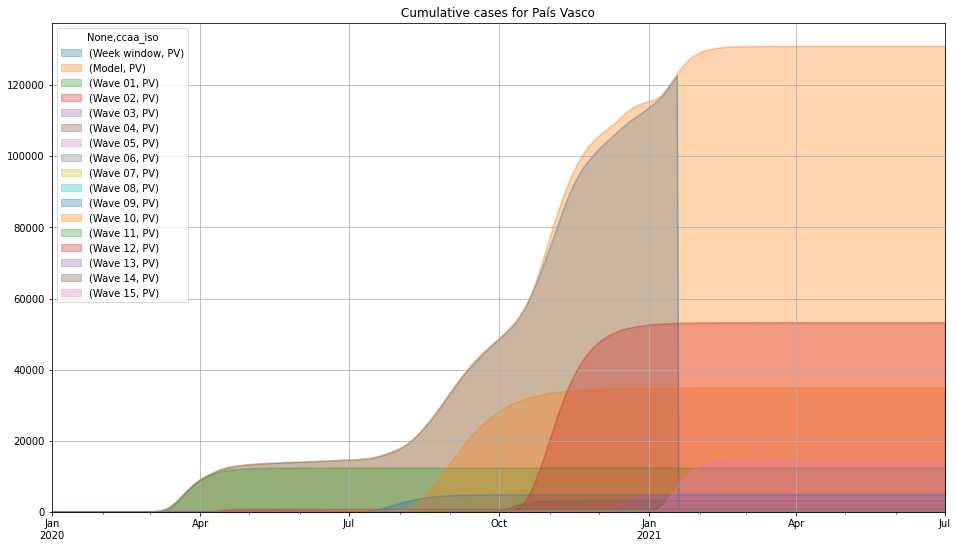

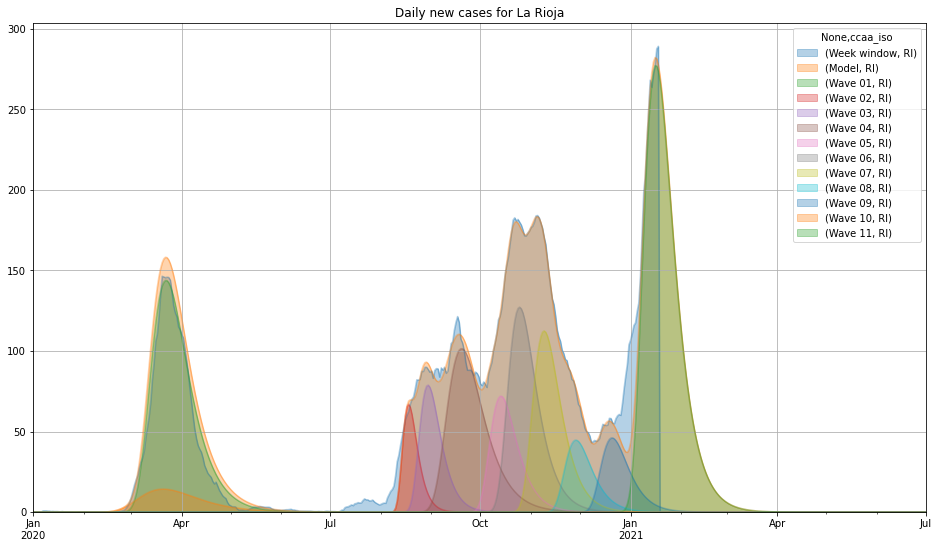

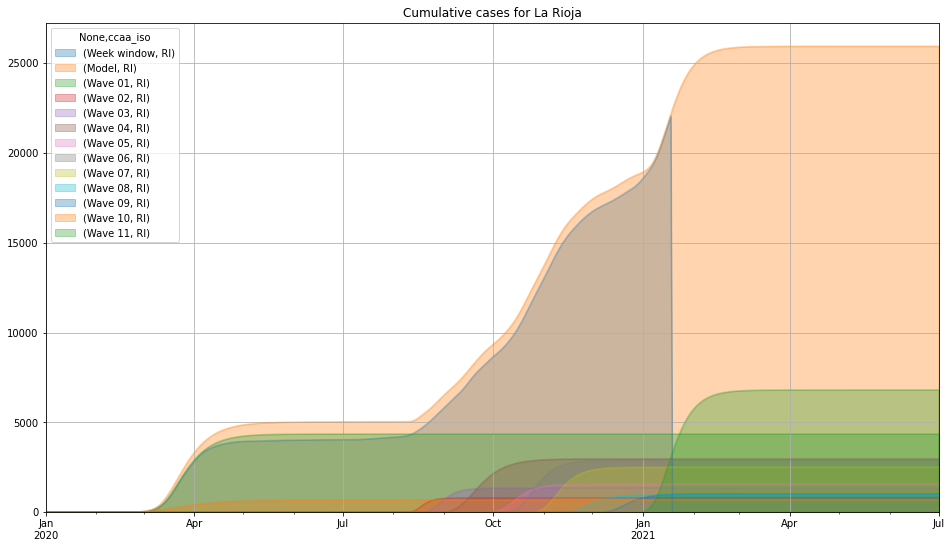

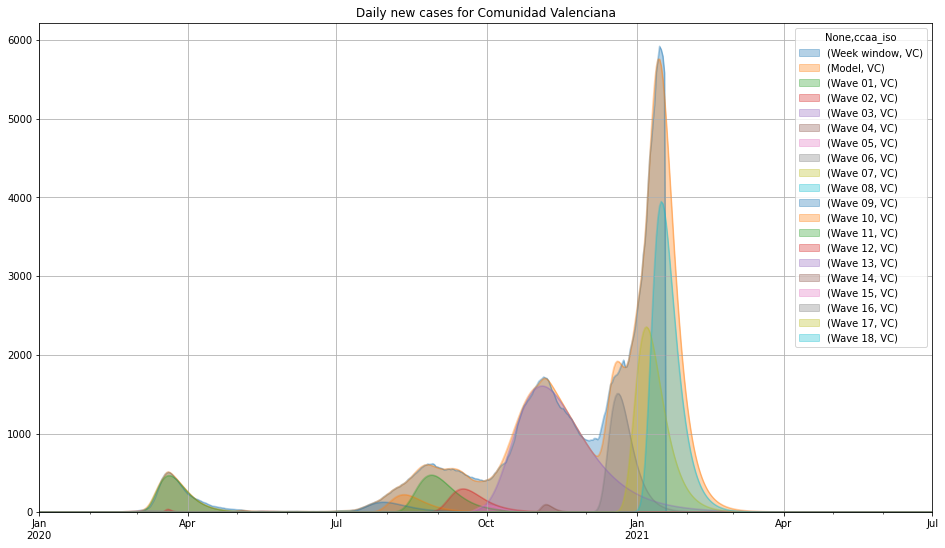

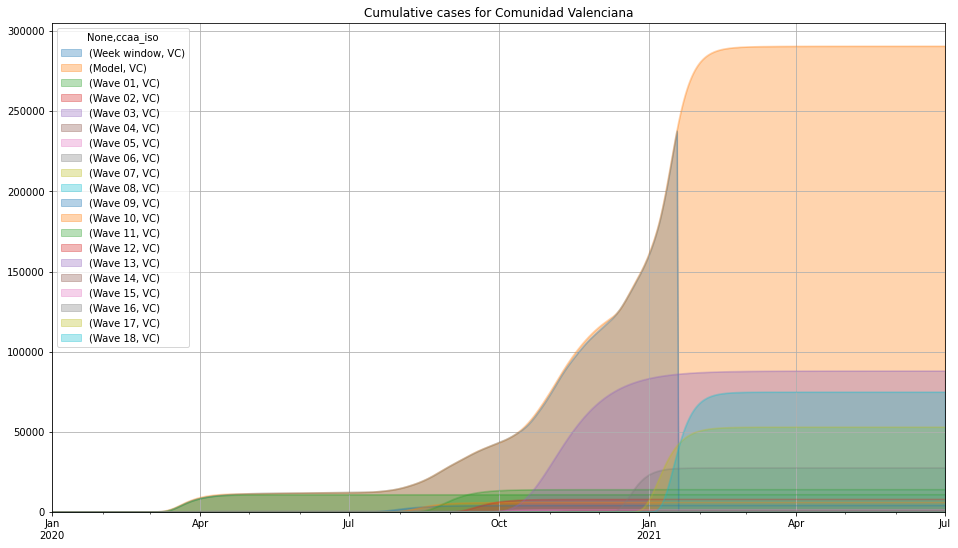

In [11]:
# Select countries to fit.
countries = np.sort(df["ccaa_iso"].unique())
# countries = ['RS', 'IL', 'US', 'UK', 'BR', 'CH', 'DE', 'IT', 'ES', 'PT', 'FR', 'SE',
#             'NO', 'DK', 'BE', 'NL', 'NZ', 'CN', 'JP', 'RU', 'AT', 'ZA', 'IN', 'KW',
#             'AU', 'BO', 'SD', 'SI']
# countries = ['BB', 'BI', 'BM', 'BZ', 'CF', 'IS', 'JE', 'LV', 'ML', 'NO', 'PF', 'VC']
# countries = ['PR']

# Choose whether to output plots per country.
showplots = True

measure = "num_casos"
smeasure = "Week window"  # smoothed
rmeasure = "rcases"  # remaining
pmeasure = "Model"  # predicted
wmeasure = "Wave "  # waves

for country in countries:

    wave = 1

    df_geo[(pmeasure, country)] = 0
    df_geo[(smeasure, country)] = (
        df_geo[measure][country].loc[:lastdate].rolling(7).mean()
    )
    df_geo[(rmeasure, country)] = df_geo[smeasure][country]

    plotlist = [(smeasure, country), (pmeasure, country)]

    countryname = df_loc[df_loc["COD_CCAA"] == country]["CCAA"].iloc[0]
    # countryname = country
    popdata = 0

    # mincases = popdata / 1e6
    # mincases = 10
    # mincases = df_geo[smeasure][country].sum() / 5000
    mincases = max(popdata / 1e6, 2)

    print("Running multiple wave analysis for {} ({})".format(countryname, country))
    print("Minimum number of cases is {:1.0f}".format(mincases))

    while True:
        curwave = wmeasure + str((wave) + 1000)[-2:]
        df_geo[(curwave, country)] = 0

        df_pred = pd.DataFrame(
            {"daynum": df_geo["daynum"], measure: df_geo[rmeasure][country]}
        )

        df_pred["gumdiv"] = df_pred[measure] / df_pred[measure].cumsum()
        df_pred = df_pred[(df_pred["gumdiv"] > 0) & (df_pred[measure] > mincases)]

        df_pred["linear"] = np.log(df_pred["gumdiv"])
        df_pred = df_pred[(df_pred["linear"] < -0.4) & (df_pred["linear"] > -4.0)]

        if len(df_pred) <= 1:
            print("--- no data left")
            break

        eax = df_pred["daynum"].values.reshape(-1, 1)
        eay = df_pred["linear"].values.reshape(-1, 1)

        eamodel = Earth(minspan=1, penalty=0, endspan=0, thresh=1e-9, check_every=1)
        # eamodel = Earth(minspan=0)
        # eamodel = Earth()
        eamodel.fit(eax, eay)

        df_pred["earth"] = eamodel.predict(eax)

        daymin = df_pred["daynum"].min()
        daymax = df_pred["daynum"].max()

        # df_pred['gbgrad'] = np.gradient(df_pred['linear'])
        # df_pred['eagrad'] = np.gradient(df_pred['earth'])
        df_pred["gbgrad"] = df_pred["linear"] - df_pred["linear"].shift(1)
        df_pred["eagrad"] = df_pred["earth"] - df_pred["earth"].shift(1)

        fitmod = export.export_python_function(eamodel)

        df_pred["knot"] = (
            (abs(df_pred["eagrad"] - df_pred["eagrad"].shift(1)) > 1e-6)
            | (df_pred["daynum"] == (daymin + 1))
            | (df_pred["daynum"] == daymax)
        )
        df_pred["daycount"] = df_pred.reset_index().index

        df_knot = df_pred[df_pred["knot"]][["daynum", "daycount", "eagrad"]]
        df_knot["daysdata"] = df_knot["daycount"].shift(-1) - df_knot["daycount"]
        df_knot["daystime"] = df_knot["daynum"].shift(-1) - df_knot["daynum"]

        df_knot["cand"] = (df_knot["eagrad"] < -1 / 44) & (df_knot["daysdata"] >= 3)

        df_knot["since"] = df_knot["daynum"] - daymin
        df_knot["score"] = (df_knot["eagrad"] ** 2) * np.sqrt(
            df_knot["daysdata"] / np.sqrt(df_knot["since"])
        )
        df_knot["choice"] = df_knot["score"] == df_knot[df_knot["cand"]]["score"].max()

        choice = df_knot[df_knot["choice"]]
        if len(choice) == 0:
            print("--- no data for wave")
            break

        lower = choice["daynum"].values[0]
        upper = choice["daysdata"].values[0] + lower

        df_pred = df_pred[
            (df_pred["daynum"] >= lower) & (df_pred["daynum"] <= upper)
        ].copy()

        slope = (fitmod([[upper]])[0] - fitmod([[lower]])[0]) / (upper - lower)
        intercept = fitmod([[lower]])[0] - (lower * slope)

        beta = -1 / slope
        mu = beta * (intercept + np.log(beta))

        df_pred["pgumb"] = gumpdf(df_pred["daynum"], beta, mu)
        df_pred["scale"] = df_pred[measure] / df_pred["pgumb"]

        final = df_pred["scale"].mean()
        fincv = df_pred["scale"].std() / final

        df_geo[(curwave, country)] = final * gumpdf(df_geo["daynum"], beta, mu)
        peak = df_geo[
            df_geo[(curwave, country)] == df_geo[(curwave, country)].max()
        ].index.min()
        start = df_geo[
            (df_geo[(curwave, country)] >= 1)
            & (df_geo[(curwave, country)].index < peak)
        ].index.min()
        floor = df_geo[
            (df_geo[(curwave, country)] < 1) & (df_geo[(curwave, country)].index > peak)
        ].index.min()
        print(
            "{} beta {:6.3f} mu {:3.0f} fit {:5.3f} peak {} from {} to {} size {:1.0f}".format(
                curwave,
                beta,
                mu,
                (1 - fincv) ** 2,
                peak.date(),
                start.date(),
                floor.date(),
                final,
            )
        )

        df_geo[(pmeasure, country)] += df_geo[(curwave, country)]
        df_geo[(rmeasure, country)] -= df_geo[(curwave, country)]
        plotlist += [(curwave, country)]
        wave += 1

    if showplots:
        df_geo[plotlist].loc["20200101":"20210701"].plot(
            figsize=(16, 9),
            grid=True,
            kind="area",
            stacked=False,
            alpha=1 / 3,
            title="Daily new cases for " + countryname,
        )
        df_geo[plotlist].loc["20200101":"20210701"].cumsum().plot(
            figsize=(16, 9),
            grid=True,
            kind="area",
            stacked=False,
            alpha=1 / 3,
            title="Cumulative cases for " + countryname,
        )

In [12]:
df_out = df_geo[pmeasure].melt(ignore_index=False).reset_index()
df_out.columns = ["date", "location", "value"]
df_out.to_csv("zzcoremc.csv")

Keep exploring! Stay home, wash your hands, keep your distance.